In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import *
import math
import re
import os
import seaborn as sbn
sbn.set_style("whitegrid")

import matplotlib.image as mpimg
import glob

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
def extract_potential(ifile):
    ifile = open(ifile,"r").readlines()
    dict_energy = {}
    shells = []
    for lines in ifile:
        shell = float(lines.split(",")[0])
        nrg = float(lines.split(",")[1])
        stddev = float(lines.split(",")[2])
        shells.append(shell)
        dict_energy[shell] = [nrg,stddev]
    #now sort out the dictionary
    new_dict_energy = {}
    
    shells.sort()
    for shell in shells:
        new_dict_energy[shell] = [dict_energy[shell][0],dict_energy[shell][1]]
    #now refill the lists
    del dict_energy
    nrgs, stddevs = [],[]
    for shell in shells:
        nrgs.append(new_dict_energy[shell][0])
        stddevs.append(new_dict_energy[shell][1])
        
    return shells,nrgs,stddevs
        

In [15]:
#1.0 Angstrom width
BWRFshell_1,BWRFnrg_1,BWRFerr_1 = extract_potential("output_average_1.00/BWRF.csv")
RFshell_1,RFnrg_1,RFerr_1 = extract_potential("output_average_1.00/RF_charge_dipole.csv")
AVGRFshell_1,AVGRFnrg_1,AVGRFerr_1 = extract_potential("output_average_1.00/AVG_RF_dipole.csv")
AVGRFintshell_1,AVGRFintnrg_1,AVGRFinterr_1 = extract_potential("output_average_1.00/AVG_RF_int_dipole.csv")
nwatershell_1,nwatern_1,nwatererr_1 = extract_potential("output_average_1.00/waters.csv")
#0.5 Angstrom width
BWRFshell_05,BWRFnrg_05,BWRFerr_05 = extract_potential("output_average_0.50//BWRF.csv")
RFshell_05,RFnrg_05,RFerr_05 = extract_potential("output_average_0.50/RF_charge_dipole.csv")
AVGRFshell_05,AVGRFnrg_05,AVGRFerr_05 = extract_potential("output_average_0.50/AVG_RF_dipole.csv")
AVGRFintshell_05,AVGRFintnrg_05,AVGRFinterr_05 = extract_potential("output_average_0.50/AVG_RF_int_dipole.csv")
nwatershell_05,nwatern_05,nwatererr_05 = extract_potential("output_average_0.50/waters.csv")
#0.5 Angstrom width
BWRFshell_02,BWRFnrg_02,BWRFerr_02 = extract_potential("output_average_0.20/BWRF.csv")
RFshell_02,RFnrg_02,RFerr_02 = extract_potential("output_average_0.20/RF_charge_dipole.csv")
AVGRFshell_02,AVGRFnrg_02,AVGRFerr_02 = extract_potential("output_average_0.20/AVG_RF_dipole.csv")
AVGRFintshell_02,AVGRFintnrg_02,AVGRFinterr_02 = extract_potential("output_average_0.20/AVG_RF_int_dipole.csv")
nwatershell_02,nwatern_02,nwatererr_02= extract_potential("output_average_0.20/waters.csv")


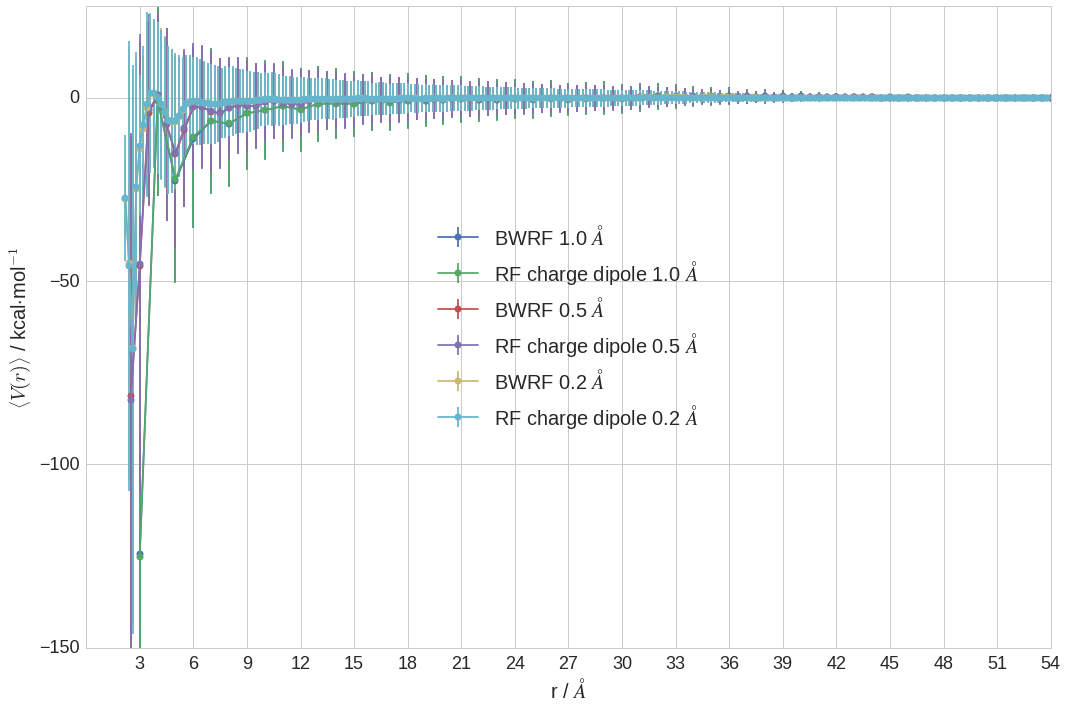

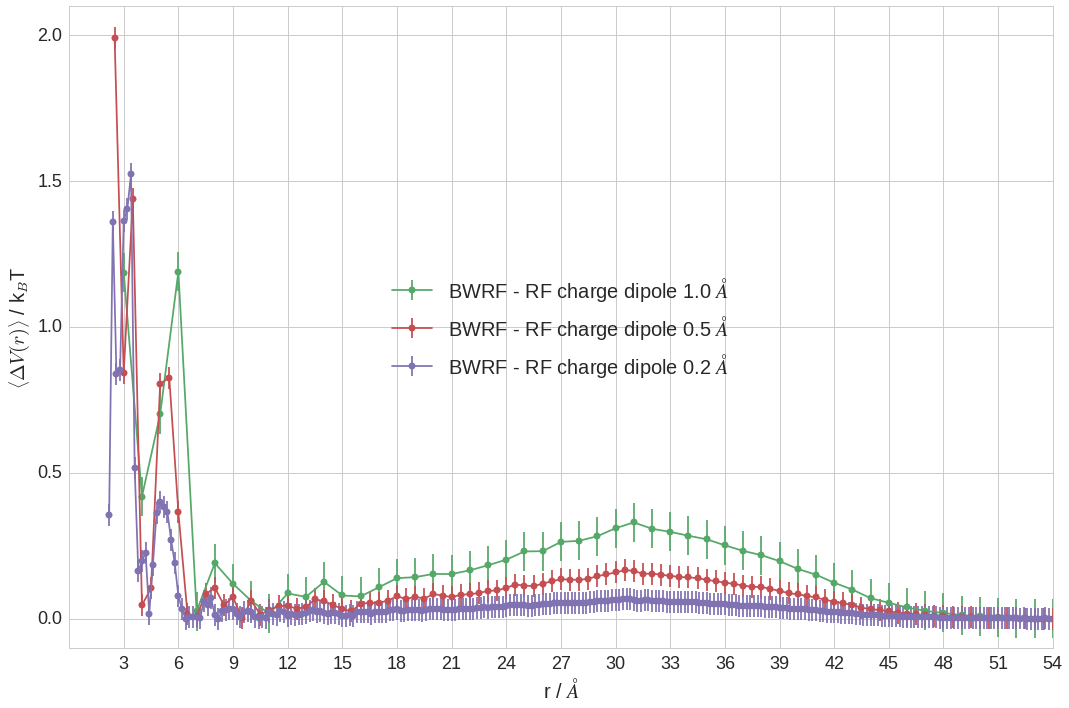

In [87]:
#plot of BWRF and RF charge-dipole at short distance for each shell width
color = sbn.color_palette()
fig, ax = plt.subplots(figsize=(15,10))

#BWRF 1.0 A
ax.errorbar(BWRFshell_1,BWRFnrg_1,color=color[0],yerr=BWRFerr_1,marker="o",label="BWRF 1.0 $\AA$")
#RF charge-dipole interaction 
ax.errorbar(RFshell_1,RFnrg_1,color=color[1],yerr=RFerr_1,marker="o",label="RF charge dipole 1.0 $\AA$")
#BWRF 0.5 A
ax.errorbar(BWRFshell_05,BWRFnrg_05,color=color[2],yerr=BWRFerr_05,marker="o",label="BWRF 0.5 $\AA$")
#RF charge-dipole interaction 
ax.errorbar(RFshell_05,RFnrg_05,color=color[3],yerr=RFerr_05,marker="o",label="RF charge dipole 0.5 $\AA$")
#BWRF 0.2 A
ax.errorbar(BWRFshell_02,BWRFnrg_02,color=color[4],yerr=BWRFerr_02,marker="o",label="BWRF 0.2 $\AA$")
#RF charge-dipole interaction 
ax.errorbar(RFshell_02,RFnrg_02,color=color[5],yerr=RFerr_02,marker="o",label="RF charge dipole 0.2 $\AA$")

ax.set_xlabel("r / $\AA$",fontsize=20)
ax.set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
ax.legend(loc="center",fontsize=20)
ax.tick_params(labelsize=18)
plt.xticks(np.arange(3, 55, 3.0))
ax.set_xlim(0,54)
ax.set_ylim(-150,25)
plt.tight_layout()



#print differences
diffsRF1 = []
diffserr1 = [] 
diffsRF05 = []
diffserr05 = [] 
diffsRF02 = []
diffserr02 = [] 
#1.0
for i,val in enumerate(BWRFnrg_1,0):
    diffRF1 = abs(val - RFnrg_1[i])/0.592
    diffsRF1.append(diffRF1)
    
    diffserr1 = math.sqrt(BWRFerr_1[i]**2+RFerr_1[i]**2)/0.592
#0.5A
for i,val in enumerate(BWRFnrg_05,0):
    diffRF05 = abs(val - RFnrg_05[i])/0.592
    diffsRF05.append(diffRF05)
    
    diffserr05 = math.sqrt(BWRFerr_05[i]**2+RFerr_05[i]**2)/0.592    
#0.2A
for i,val in enumerate(BWRFnrg_02,0):
    diffRF02 = abs(val - RFnrg_02[i])/0.592
    diffsRF02.append(diffRF02)
    
    diffserr02 = math.sqrt(BWRFerr_02[i]**2+RFerr_02[i]**2)/0.592
    

#plot the differences
color = sbn.color_palette()
fig, ax = plt.subplots(figsize=(15,10))

#BWRF 1.0
ax.errorbar(BWRFshell_1,diffsRF1,color=color[1],yerr=diffserr1,marker="o",label="BWRF - RF charge dipole 1.0 $\AA$")
#0.5 A
ax.errorbar(BWRFshell_05,diffsRF05,color=color[2],yerr=diffserr05,marker="o",label="BWRF - RF charge dipole 0.5 $\AA$")
#0.2 A
ax.errorbar(BWRFshell_02,diffsRF02,color=color[3],yerr=diffserr02,marker="o",label="BWRF - RF charge dipole 0.2 $\AA$")

ax.set_xlabel("r / $\AA$",fontsize=20)
ax.set_ylabel(r"$\left \langle \Delta V(r) \right \rangle$ / k$_B$T" ,fontsize=20)
ax.legend(loc="center",fontsize=20)
ax.tick_params(labelsize=18)
ax.set_xlim(0,54)
ax.set_ylim(-0.1,2.1)
plt.xticks(np.arange(3, 55, 3.0))

plt.tight_layout()
plt.savefig("Figure2_BWRF-RF.png",dpi=300)

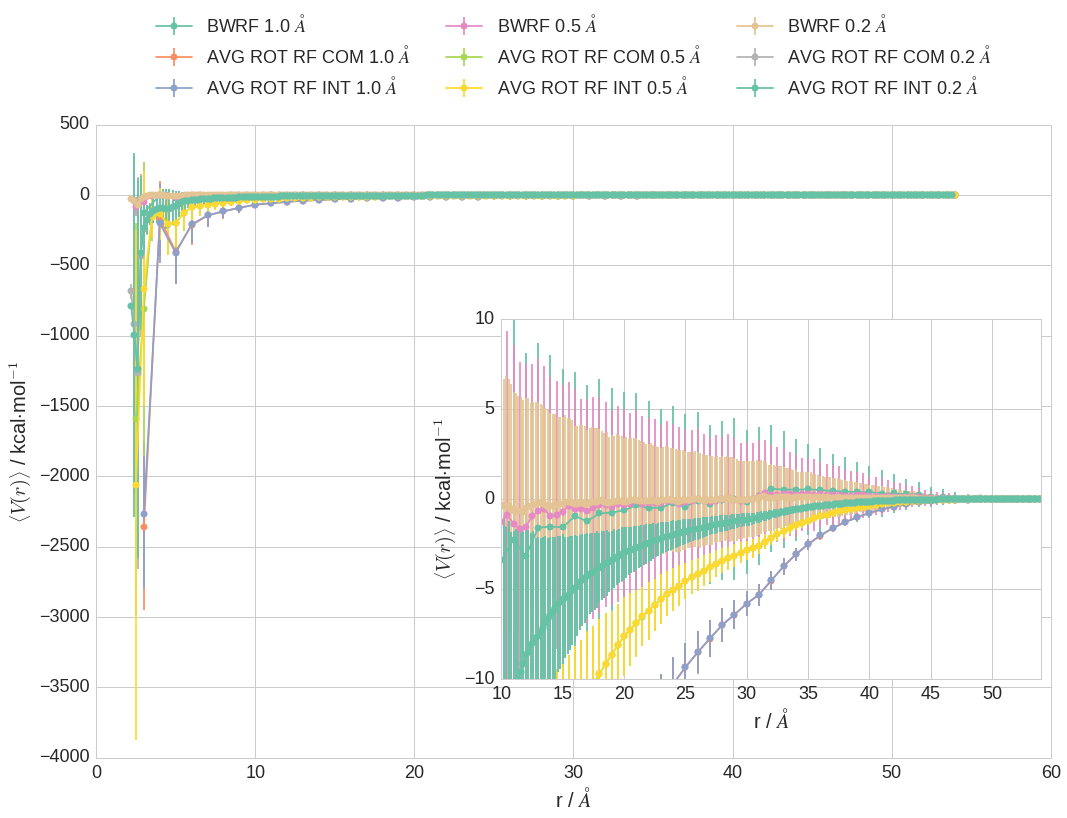

In [88]:
#plot
color = sbn.color_palette(sbn.color_palette("Set2", 10))
fig, ax = plt.subplots(figsize=(15,10))

#BWRF 1.0 A
ax.errorbar(BWRFshell_1,BWRFnrg_1,color=color[0],yerr=BWRFerr_1,marker="o",label="BWRF 1.0 $\AA$")
#AVG ROT RF
ax.errorbar(AVGRFshell_1,AVGRFnrg_1,color=color[1],yerr=AVGRFerr_1,marker="o",label="AVG ROT RF COM 1.0 $\AA$")
#AVG ROT RF integrated
ax.errorbar(AVGRFintshell_1,AVGRFintnrg_1,color=color[2],yerr=AVGRFinterr_1,marker="o",label="AVG ROT RF INT 1.0 $\AA$")

#BWRF 0.5 A
ax.errorbar(BWRFshell_05,BWRFnrg_05,color=color[3],yerr=BWRFerr_05,marker="o",label="BWRF 0.5 $\AA$")
#AVG ROT RF
ax.errorbar(AVGRFshell_05,AVGRFnrg_05,color=color[4],yerr=AVGRFerr_05,marker="o",label="AVG ROT RF COM 0.5 $\AA$")
#AVG ROT RF integrated
ax.errorbar(AVGRFintshell_05,AVGRFintnrg_05,color=color[5],yerr=AVGRFinterr_05,marker="o",label="AVG ROT RF INT 0.5 $\AA$")

#BWRF 0.2 A
ax.errorbar(BWRFshell_02,BWRFnrg_02,color=color[6],yerr=BWRFerr_02,marker="o",label="BWRF 0.2 $\AA$")
#AVG ROT RF
ax.errorbar(AVGRFshell_02,AVGRFnrg_02,color=color[7],yerr=AVGRFerr_02,marker="o",label="AVG ROT RF COM 0.2 $\AA$")
#AVG ROT RF integrated
ax.errorbar(AVGRFintshell_02,AVGRFintnrg_02,color=color[8],yerr=AVGRFinterr_02,marker="o",label="AVG ROT RF INT 0.2 $\AA$")



ax.set_xlabel("r / $\AA$",fontsize=20)
ax.set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
ax.tick_params(labelsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),ncol=3, fancybox=True, shadow=True,fontsize=18)
#ax.set_xlim(10,54)
#ax.set_ylim(-10,10)
#
#ax.set_xlim(3,10)
#ax.set_ylim(-50,0)
plt.tight_layout()

left, bottom, width, height = [0.47, 0.2, 0.5, 0.5]
ax2 = fig.add_axes([left, bottom, width, height])
#BWRF 1.0 A
ax2.errorbar(BWRFshell_1,BWRFnrg_1,color=color[0],yerr=BWRFerr_1,marker="o",label="BWRF 1.0 $\AA$")
#AVG ROT RF
ax2.errorbar(AVGRFshell_1,AVGRFnrg_1,color=color[1],yerr=AVGRFerr_1,marker="o",label="AVG ROT RF COM 1.0 $\AA$")
#AVG ROT RF integrated
ax2.errorbar(AVGRFintshell_1,AVGRFintnrg_1,color=color[2],yerr=AVGRFinterr_1,marker="o",label="AVG ROT RF INT 1.0 $\AA$")

#BWRF 0.5 A
ax2.errorbar(BWRFshell_05,BWRFnrg_05,color=color[3],yerr=BWRFerr_05,marker="o",label="BWRF 0.5 $\AA$")
#AVG ROT RF
ax2.errorbar(AVGRFshell_05,AVGRFnrg_05,color=color[4],yerr=AVGRFerr_05,marker="o",label="AVG ROT RF COM 0.5 $\AA$")
#AVG ROT RF integrated
ax2.errorbar(AVGRFintshell_05,AVGRFintnrg_05,color=color[5],yerr=AVGRFinterr_05,marker="o",label="AVG ROT RF INT 0.5 $\AA$")

#BWRF 0.2 A
ax2.errorbar(BWRFshell_02,BWRFnrg_02,color=color[6],yerr=BWRFerr_02,marker="o",label="BWRF 0.2 $\AA$")
#AVG ROT RF
ax2.errorbar(AVGRFshell_02,AVGRFnrg_02,color=color[7],yerr=AVGRFerr_02,marker="o",label="AVG ROT RF COM 0.2 $\AA$")
#AVG ROT RF integrated
ax2.errorbar(AVGRFintshell_02,AVGRFintnrg_02,color=color[8],yerr=AVGRFinterr_02,marker="o",label="AVG ROT RF INT 0.2 $\AA$")



ax2.set_xlabel("r / $\AA$",fontsize=20)
ax2.set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
#ax2.legend(loc="best",fontsize=20)
ax2.tick_params(labelsize=18)
ax2.set_xlim(10,54)
ax2.set_ylim(-10,10)
plt.tight_layout()#


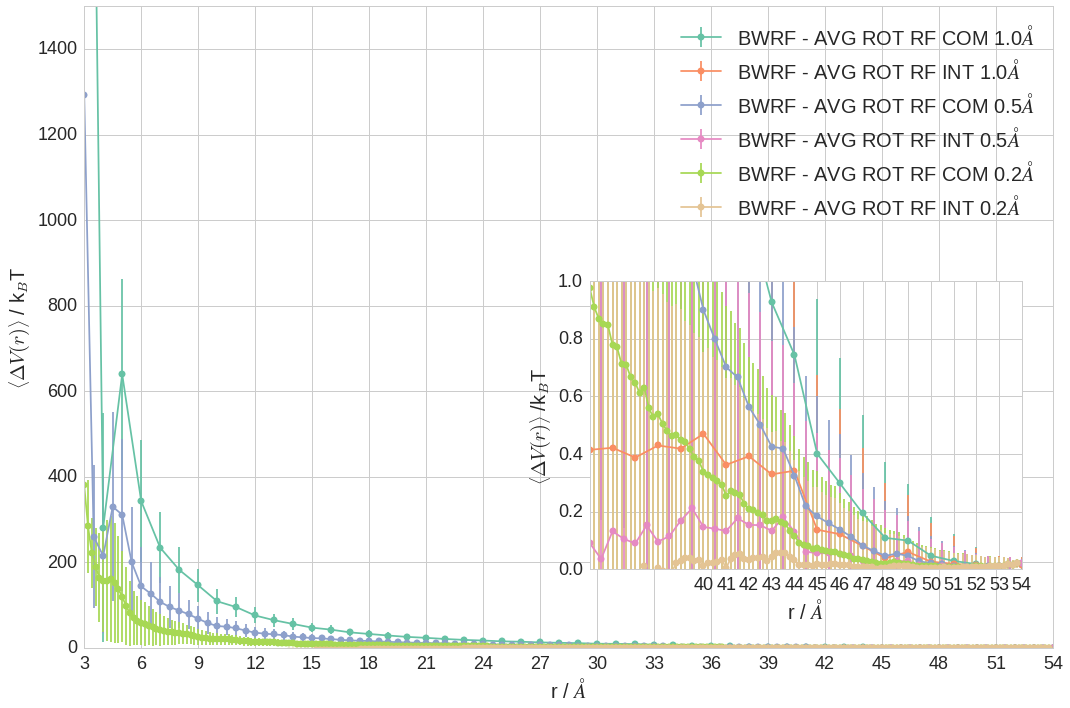

In [89]:
#1.0
diffsCOM1 = []
errsCOM1 = []
diffsINT1 = []
errsINT1 = []
#0.5
diffsCOM05 = []
errsCOM05 = []
diffsINT05 = []
errsINT05 = []
#0.2
diffsCOM02 = []
errsCOM02 = []
diffsINT02 = []
errsINT02 = []

for i,val in enumerate(BWRFnrg_1,0):
    diffCOM1 = (val - AVGRFnrg_1[i])/0.592
    errCOM1 = math.sqrt(BWRFerr_1[i]**2 + AVGRFerr_1[i]**2)
    diffINT1 = (val - AVGRFerr_1[i])/0.592
    errINT1 = math.sqrt(BWRFerr_1[i]**2 + AVGRFinterr_1[i]**2)
    diffsCOM1.append(diffCOM1)
    diffsINT1.append(diffINT1)
    errsCOM1.append(errCOM1)
    errsINT1.append(errINT1)
    
for i,val in enumerate(BWRFnrg_05,0):
    diffCOM1 = (val - AVGRFnrg_05[i])/0.592
    errCOM1 = math.sqrt(BWRFerr_05[i]**2 + AVGRFerr_05[i]**2)
    diffINT1 = (val - AVGRFerr_05[i])/0.592
    errINT1 = math.sqrt(BWRFerr_05[i]**2 + AVGRFinterr_05[i]**2)
    diffsCOM05.append(diffCOM1)
    diffsINT05.append(diffINT1)
    errsCOM05.append(errCOM1)
    errsINT05.append(errINT1)
     
for i,val in enumerate(BWRFnrg_02,0):
    diffCOM1 = (val - AVGRFnrg_02[i])/0.592
    errCOM1 = math.sqrt(BWRFerr_02[i]**2 + AVGRFerr_02[i]**2)
    diffINT1 = (val - AVGRFerr_02[i])/0.592
    errINT1 = math.sqrt(BWRFerr_02[i]**2 + AVGRFinterr_02[i]**2)
    diffsCOM02.append(diffCOM1)
    diffsINT02.append(diffINT1)
    errsCOM02.append(errCOM1)
    errsINT02.append(errINT1)  
    
    
#plot the difference
color = sbn.color_palette(sbn.color_palette("Set2", 10))
fig, ax = plt.subplots(figsize=(15,10))

#BWRF-COM and BWRF-INT
ax.errorbar(BWRFshell_1,diffsCOM1,color=color[0],yerr=errsCOM1,marker="o",label="BWRF - AVG ROT RF COM 1.0$\AA$")
ax.errorbar(BWRFshell_1,diffsINT1,color=color[1],yerr=errsINT1,marker="o",label="BWRF - AVG ROT RF INT 1.0$\AA$")
#BWRF-COM and BWRF-INT 0.5
ax.errorbar(BWRFshell_05,diffsCOM05,color=color[2],yerr=errsCOM05,marker="o",label="BWRF - AVG ROT RF COM 0.5$\AA$")
ax.errorbar(BWRFshell_05,diffsINT05,color=color[3],yerr=errsINT05,marker="o",label="BWRF - AVG ROT RF INT 0.5$\AA$")
#BWRF-COM and BWRF-INT 0.2
ax.errorbar(BWRFshell_02,diffsCOM02,color=color[4],yerr=errsCOM02,marker="o",label="BWRF - AVG ROT RF COM 0.2$\AA$")
ax.errorbar(BWRFshell_02,diffsINT02,color=color[6],yerr=errsINT02,marker="o",label="BWRF - AVG ROT RF INT 0.2$\AA$")


ax.set_xlabel("r / $\AA$",fontsize=20)
ax.set_ylabel(r"$\left \langle \Delta V(r) \right \rangle$ / k$_B$T" ,fontsize=20)
ax.legend(loc="best",fontsize=20)
ax.tick_params(labelsize=18)
ax.set_xlim(3,54)
ax.set_ylim(0,1500)
#
#ax.set_xlim(3,10)
#ax.set_ylim(-50,0)
plt.xticks(np.arange(3, 55, 3.0))

plt.tight_layout()


##add the INSET with xlim 10,54
left, bottom, width, height = [0.55, 0.2, 0.4, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

#BWRF-COM and BWRF-INT
ax2.errorbar(BWRFshell_1,diffsCOM1,color=color[0],yerr=errsCOM1,marker="o",label="BWRF - AVG ROT RF COM 1$\AA$")
ax2.errorbar(BWRFshell_1,diffsINT1,color=color[1],yerr=errsINT1,marker="o",label="BWRF - AVG ROT RF INT 1$\AA$")
#BWRF-COM and BWRF-INT 0.5
ax2.errorbar(BWRFshell_05,diffsCOM05,color=color[2],yerr=errsCOM05,marker="o",label="BWRF - AVG ROT RF COM 0.5$\AA$")
ax2.errorbar(BWRFshell_05,diffsINT05,color=color[3],yerr=errsINT05,marker="o",label="BWRF - AVG ROT RF INT 0.5$\AA$")
#BWRF-COM and BWRF-INT 0.2
ax2.errorbar(BWRFshell_02,diffsCOM02,color=color[4],yerr=errsCOM02,marker="o",label="BWRF - AVG ROT RF COM 0.2$\AA$")
ax2.errorbar(BWRFshell_02,diffsINT02,color=color[6],yerr=errsINT02,marker="o",label="BWRF - AVG ROT RF INT 0.2$\AA$")

ax2.set_xlabel("r / $\AA$",fontsize=20)
ax2.set_ylabel(r"$\left \langle \Delta V(r) \right \rangle$ /k$_B$T" ,fontsize=20)
#ax2.legend(loc="best",fontsize=20)
ax2.tick_params(labelsize=18)
ax2.set_xlim(35,54)
ax2.set_ylim(0,1)
plt.xticks(np.arange(40, 55, 1.0))

plt.tight_layout()#

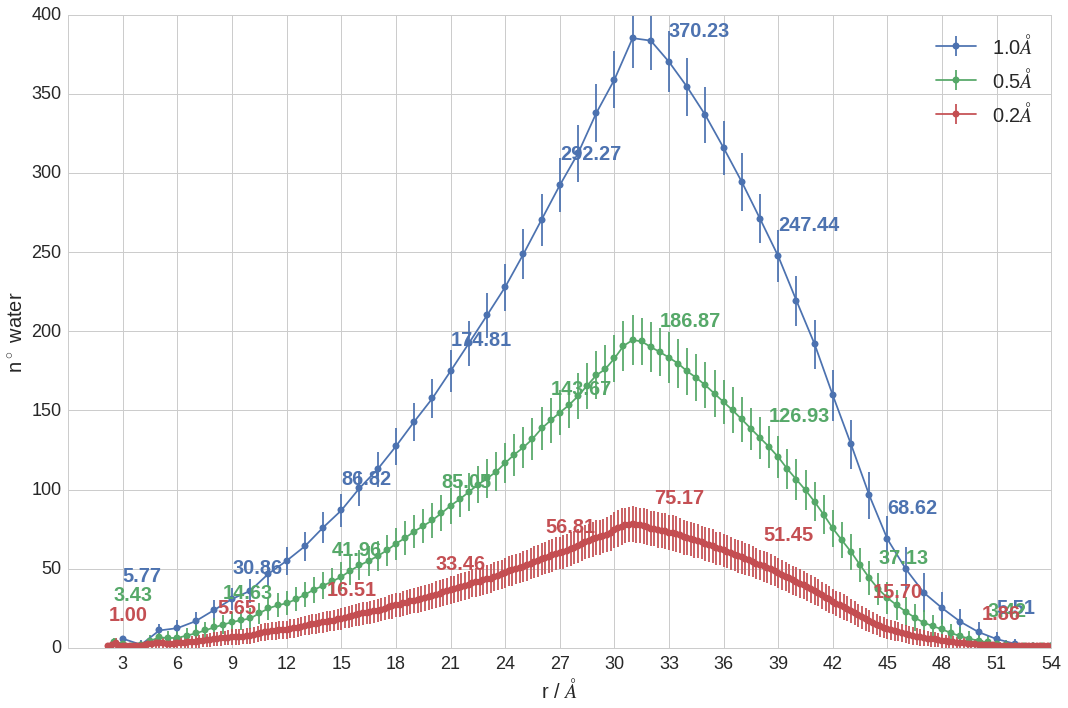

In [90]:
#plot the number of water molecules for each shell
color = sbn.color_palette()
fig, ax = plt.subplots(figsize=(15,10))

#nwatershell_1,nwatern_1,nwatererr_1 = extract_potential("output_average_1.00/waters.csv")

ax.errorbar(nwatershell_1,nwatern_1,color=color[0],yerr=nwatererr_1,marker="o",label="1.0$\AA$")
ax.errorbar(nwatershell_05,nwatern_05,color=color[1],yerr=nwatererr_05,marker="o",label="0.5$\AA$")
ax.errorbar(nwatershell_02,nwatern_02,color=color[2],yerr=nwatererr_02,marker="o",label="0.2$\AA$")

counter = 0 
for i,j in zip(nwatershell_1,nwatern_1):
    if counter==0:
        ax.annotate("%.2f" % j,xy=(i,j+40),textcoords='data',fontsize=20, fontweight="bold",verticalalignment="center",color=color[0])
        counter+=1
    elif counter%6 == 0:
        ax.annotate("%.2f" % j,xy=(i,j+20),textcoords='data',fontsize=20, fontweight="bold",verticalalignment="center",color=color[0])
        counter+=1       
    else:
        counter+=1
        
counter = 0 
for i,j in zip(nwatershell_05,nwatern_05):
    if counter==0:
        ax.annotate("%.2f" % j,xy=(i,j+30),textcoords='data',fontsize=20, fontweight="bold",verticalalignment="center",color=color[1])
        counter+=1
    elif counter%12 == 0:
        ax.annotate("%.2f" % j,xy=(i,j+20),textcoords='data',fontsize=20, fontweight="bold",verticalalignment="center",color=color[1])
        counter+=1      
    else:
        counter+=1
        
counter = 0 
for i,j in zip(nwatershell_02,nwatern_02):
    if counter==0:
        ax.annotate("%.2f" % j,xy=(i,j+20),textcoords='data',fontsize=20, fontweight="bold",verticalalignment="center",color=color[2])
        counter+=1
    elif counter%30 == 0:
        ax.annotate("%.2f" % j,xy=(i,j+20),textcoords='data',fontsize=20, fontweight="bold",verticalalignment="center",color=color[2])
        counter+=1      
    else:
        counter+=1
        
ax.set_xlabel("r / $\AA$",fontsize=20)
ax.set_ylabel(r"n$^\circ$ water " ,fontsize=20)
ax.legend(loc="best",fontsize=20)
ax.tick_params(labelsize=18)
plt.xticks(np.arange(3, 55, 3.0))
ax.set_xlim(0,54)
ax.set_ylim(0,400)
plt.tight_layout()
plt.savefig("Figure3_nwaters.png",dpi=300)
